In [1]:
import sys
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

current = Path().resolve()
sys.path.append(str(current))
sys.path.append(str(current.parents[1]))

from src.enums import *
from src.utils import *
from src.market_data import *
from src.pricer import *
# # Make charts interactive
# %matplotlib notebook

# Initialize market data
MarketData.initialize()

<h4><center> Introduction to building a quant pricing library practice
 </center></h4>

<h1><center> Pricing Barrier Options </center></h1>

<h4><center>
<h3><center> Varga László </center></h3> <br /> 
</center></h4>
     
<h4><center> <a href="mailto:vargala4@gmail.com">vargala4@gmail.com</a>  </center></h4>    

<h3><center> Introduction - Barrier options </center></h3>

- Derivative which payoff depends on whether the underlier's price has reached a pre-determined barrier value
- Payoff is path-dependent
- Exercise is usually European style





- Advantages:
    - A wisely chosen barrier option may provide additional protection, therefore they are very popolar tools for hedging
    - Barrier option prices are smaller than the prices of the respective vanilla options


<h3><center> Mathematical notations </center></h3>

- $(S_t)_{t\in [0,T]}$: asset price process, usually the GBM process with parameters $r$ and $\sigma$
- $T$: exercise date
- $K$: strike
- $\{ t_1,\ldots,t_n \}$: monitoring dates, $0\leq t_1 \leq \ldots \leq t_n \leq T$ 
- $B$: barrier level
- $x_+=max(x,0)$: positive value of $x$
- $I(\cdot)$: indicator function

<h3><center> Types of barrier options </center></h3>

- Call or Put
- Knock-in or knock-out
    - knock-in: the option becomes active if the barrier is breached
    - knock-out: the option becomes active if the barrier is not breached
- **Single** (upper or lower) or double (upper and lower) barrier
- Continuously or discretely monitored
    - continuously: the breach is considered in every point in interval $[0,T]$
    - discretely: the breach is checked only in a finite number of time points (monitoring points). Daily monitoring contract is the most common.
    


<h3><center> Types of single barrier options - combinations </center></h3>

- Combinations: D/U & I/O & C/P  $\longrightarrow$ 8 combinations
    - D/U: down or up (lower or upper barrier)
    - I/O: knock-in or knock-out
    - C/P: call or put
- For example DIC barrier option denotes a down-and-in call barrier option
- Pricing formulas are different in cases $B\leq K$ and $B \geq K$ $\Longrightarrow$ 16 different analytic pricing formulas in case of continuous monitoring and GBM market conditions
    


<h3><center> Payoff of barrier options </center></h3>

- Down-and-in call (DIC) option: $ I\left(\exists t\in [0,T]:\ S_t \leq B\right)\cdot (S_T-K)_+
= I\left(\underset{t\in [0,T]}{min}S_t \leq B\right)\cdot (S_T-K)_+$ 

- Down-and-out call (DOC) option: $ I(\forall t\in [0,T]:\ S_t > B)\cdot (S_T-K)_+= I\left(\underset{t\in [0,T]}{min}S_t > B\right)\cdot (S_T-K)_+$  

- In-out parity: $\quad P_{DIC}+P_{DOC} = P_{European\ Call}$

- Up-and-in call (UIC) option: $ I(\exists t\in [0,T]:\ S_t \geq B)\cdot (S_T-K)_+= I\left(\underset{t\in [0,T]}{max}S_t \geq B\right)\cdot (S_T-K)_+$
- Up-and-out call (UOC) option: $ I(\forall t\in [0,T]:\ S_t < B)\cdot (S_T-K)_+= I\left(\underset{t\in [0,T]}{max}S_t < B\right)\cdot (S_T-K)_+$
- In-out parity: $\quad P_{UIC}+P_{UOC} = P_{European\ Call}$

<h3><center> Payoff of barrier options </center></h3>


Can we squeeze the payoff of different types of barrier options in one formula?


Payoff$ \ =multiplier \cdot \left[\phi \cdot (S_T-K)\right]_+$, where

- $\phi\ $ is $+1$ if the option is call, and $-1$ if the option is put
- $multiplier=I(KI)\cdot I(breach)+(1-I(KI))\cdot (1-I(breach))\quad$
    - $I(KI)$: indicator of whether the option is knock-in
    - $I(breach)$: indicator of whether the barrier is breached

<h3><center> Popular pricing methods of Barrier options </center></h3>

|$S_t$ is GBM | Continuous monitoring | Discrete monitoring
|:---   |:---| :--- | 
Yes | Analytic formulas | - Monte Carlo methods, with improvements <br> - PDE methods if there is 1 underlying
No | - Discretizing, then Brownian bridges technique <br> with exact breach probabilities  <br> - PDE methods if there is 1 underlying| - Brownian bridges technique <br> with approximate breach probabilites <br> - PDE methods if there is 1 underlying


<h3><center> Risk-free pricing of the UIC option for $t=0$ under continuous monitoring </center></h3>

Risk-free pricing formula: $\small \quad e^{-rT}E_*\left[I\left(\underset{t\in [0,T]}{max}S_t \geq B\right)\cdot (S_T-K)_+\right] $



$ \qquad \qquad \qquad = e^{-rT} \int\limits_{-\infty}^{\infty}\int\limits_{-\infty}^{\infty} I\left(x \geq B\right)\cdot (y-K)_+ f_{\underset{t\in [0,T]}{max}S_t,S_T}(x,y)\, dx \,dy $



If $S_t$ is the GBM process, then based on the reflection principle on the Brownian motion, the joint density function will become the following ($\mu = -\frac{\sigma}{2}+\frac{r}{\sigma} $):

$f_{\underset{t\in [0,T]}{max}S_t,S_T}(x,y) = I\left( x \geq max(y,0) \right) \cdot \frac{1}{T} \sqrt{\frac{2}{\pi T}}(2x-y)e^{-\frac{-\mu^2 T}{2}+\mu y - \frac{(2x-y)^2}{2T} } \qquad $

<h3><center> Pricing for $t=0$ under GBM and continuous monitoring </center></h3>

- Let us denote by $\delta^t_{\pm}(s)=\frac{1}{\sigma\sqrt{t}}\left( log (s) + \left( r\pm \frac{\sigma^2}{2} \right)t \right)$, $\quad s>0$
- DIC price if $B\leq K$: $\quad S_0\left( \frac{B}{S_0}\right)^{1+\frac{2r}{\sigma^2}}\Phi\left( \delta^T_+\left( \frac{B^2}{KS_0} \right) \right)  - 
e^{-rT} K \left( \frac{S_0}{B} \right)^{1-\frac{2r}{\sigma^2}} \Phi\left( \delta^T_-\left( \frac{B^2}{KS_0} \right) \right) $


<h3><center> Pricing for $t=0$ under GBM and continuous monitoring </center></h3>

- Black-Scholes formula: $BS_{call}(S_0, K, T, \sigma, r) = 
S_0 \Phi\left( \delta_+^T \left( \frac{S_0}{K} \right) \right) - K e^{-rT} \Phi\left( \delta_-^T \left( \frac{S_0}{K} \right) \right)$
- Using the B-S formula, the DIC price becomes (if $B\leq K$): 
$\quad S_0\left( \frac{B}{S_0}\right)^{\frac{2r}{\sigma^2}} BS_{call}\left( \frac{B}{S_0}, \frac{K}{B}, T, \sigma, r \right) $
- DOC price if $B\leq K$: 
$\qquad BS_{call}(S_0, K, T, \sigma, r) - S_0\left( \frac{B}{S_0}\right)^{\frac{2r}{\sigma^2}} BS_{call}\left( \frac{B}{S_0}, \frac{K}{B}, T, \sigma, r \right) $


<h3><center> Exercises </center></h3>

- Showing the Barrier pricer in the codebase and do some pricing exercise.

- Convergence of discrete monitoring MC pricer to the analytic continuous monitoring pricer.

- Let us simulate a random path and make a graph from it.

In [2]:
und = Stock.TEST_COMPANY
model = BSVolModel(und)
model.spot

100.0

In [3]:
strike = 100
num_mon = 1000
barrier = 90
up_down = UpDown.DOWN
in_out = InOut.IN
dtype = PutCallFwd.CALL
long_short = LongShort.LONG
expiry = 1

In [4]:
contract = EuropeanBarrierContract(und, dtype, long_short, strike, expiry,
                 num_mon, barrier, up_down, in_out)

params = Params()

In [5]:
pricer_AN = BarrierAnalyticPricer(contract, model, params)
pricer_AN.calc_fair_value()

4.838479479055546

In [6]:
method = GreekMethod.BUMP
pricer_AN.calc_delta(method)

-0.2855952414752889

In [9]:
params_MC = MCParams(seed = 1, num_of_path = 100, tenor_frequency = 1)
pricer_MC = GenericMCPricer(contract, model, params_MC)
pricer_MC.calc_fair_value_with_ci()

(3.7456098650283365, (1.3586242846760197, 6.132595445380653))

In [10]:
pricer_MC.calc_delta(method)

0.005560245391077245

In [11]:
method = MCMethodFlatVol(contract, model, params_MC)
paths = method.simulate_spot_paths()


In [12]:
paths.shape

(100, 1000)

In [15]:
path = np.concatenate((np.array([model.spot]), paths[2, :]))
# path

array([100.        ,  99.58020406,  99.00859924, ...,  81.09280471,
        81.03758459,  81.2012901 ])

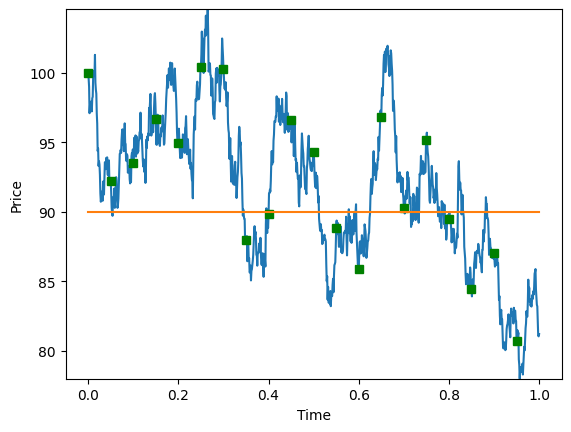

In [16]:
timeline = [0] + contract.get_timeline()
timeline_2 = [timeline[50*i] for i in range(int(np.floor(len(timeline)/50)))]
path_2 = [path[50*i] for i in range(int(np.floor(len(timeline)/50)))]
barrier_timeline = [barrier for i in timeline]

plt.figure(0)
plt.plot(timeline, path, timeline_2, path_2, 'gs', timeline, barrier_timeline)

plt.ylim(min(min(path), barrier), max(max(path), barrier))
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()

<h3><center> Brownian bridge technique </center></h3>

- Idea: 
    - We do not want to generate too long paths because of efficiency/computing reasons, just shorter ones. 
    - Let us calculate and use the probability that between two observation points the barrier is breached.


- Tool: (generalized) Brownian bridge: $\ B_{t, \ t\in[t_1,t_2]}=\left( W_t \ |\ W_{t_1}=a, W_{t_2}=b \right)$

- Probability that in interval $[t_{i-1}, t_i]$ the price breaches the lower barrier:

$\hspace{15mm} p_i := P\left( \underset{t\in [t_{i-1},t_i]}{min} S_t < B \ |\ S_{t_{i-1}}=c, S_{t_i}=d \right) = \\ \hspace{50mm} =
\begin{cases} exp\left\{ -\frac{2log\left( \frac{c}{B}\right)log\left( \frac{d}{B}\right)}{\sigma^2(t_i-t_{i-1})} \right\} & if \ B>min(c,d) \\ 1 & otherwise
\end{cases}$


- Probability that in interval $[0, T]$ the price breaches the lower barrier: 

$\hspace{60mm} p = 1- \prod\limits_{i=1}^n (1-p_i)$

- Where/how can we utilize this probability?

- We modify the payoff a bit:

    Payoff $\ =multiplier \cdot \left[\phi \cdot (S_T-K)\right]_+$, 
    - where $\phi$ is $+1$ if the option is call, and $-1$ if the option is put
    - $multiplier=I(KI)\cdot \color{blue}{p}+(1-I(KI))\cdot (1-\color{blue}{p})\quad$
        - $I(KI)$: indicator of whether the option is knock-in
        - $\color{blue}{p}$: probability that the barrier is breached

- In case of discrete (typically daily) monitoring the following approximation usually performs well:

$\hspace{40mm} p \approx max(p_1, \ldots, p_n)$

<h3><center> Exercises </center></h3>

- Assess the performance of the Brownian bridge MC pricer, make a comparison with the continuous monitoring pricer.



In [ ]:
pricer_AN.calc_fair_value()


In [ ]:
nr_monitoring_points_BB = 100
contract_BB = EuropeanBarrierContract(und, dtype, long_short, strike, expiry, 
                                   nr_monitoring_points_BB, barrier, up_down, in_out)
params_MC = MCParams(seed = 1, num_of_path = 10000, tenor_frequency = 1)
pricer_BB = BarrierBrownianBridgePricer(contract_BB, model, params_MC)
print(pricer_BB.calc_fair_value())

In [ ]:
nr_monitoring_points_list = [3, 5, 10, 20, 50, 100]

price_AN_list = [pricer_AN.calc_fair_value() for _ in nr_monitoring_points_list]

contract_list = [EuropeanBarrierContract(und, dtype, long_short, strike, expiry, 
                                   nr_monitoring_points, barrier, up_down, in_out)
                 for nr_monitoring_points in nr_monitoring_points_list]

price_BB_list = [BarrierBrownianBridgePricer(contract, model, params_MC).calc_fair_value() for contract in contract_list]

In [ ]:
plt.figure(1)
plt.plot(nr_monitoring_points_list, price_AN_list, label="Price_Analytic")
plt.plot(nr_monitoring_points_list, [val[0] for val in price_BB_list], label="Price_BrownianBridge")
plt.plot(nr_monitoring_points_list, [val[1][0] for val in price_BB_list], ':', color="r", label="95% confidence interval")
plt.plot(nr_monitoring_points_list, [val[1][1] for val in price_BB_list], ':', color="r")
plt.xlabel('Number of monitoring points')
plt.ylabel('Price')
plt.legend()
plt.show()

<h3><center> Assignment </center></h3>

- Implementat the barrier UIP and UOP pricers. Do a comparison between the analytic and the Brownian bridges technique, create a unit test.


<h3><center> Conclusions </center></h3>

- Basic Monte Carlo pricers are too slow to price barrier options in a front office environment and convergence is slow to the continuous case.
- Monte Carlo pricers enhanced with the Brownian bridge technique perform well. 

<h3><center> References </center></h3>

- N. Privault: Introduction to Stochastic Finance with Market Examples. Chapter 11: Barrier options, Chapman & Hall/CRC, 2022
- E. Gobet: Advanced Monte Carlo methods for barrier and related exotic options. Mathematical Modeling and Numerical Methods in Finance, Elsevier, pp.497-528, 2009, *Handbook of Numerical Analysis*
